# Hand Gesture Recognition

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from scipy.fft import fft, fftfreq

In [2]:
data_dir = '../recordings/01_12_24_initial_placement_test/data'

for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../recordings/01_12_24_initial_placement_test/data/nad_middle_0.csv
../recordings/01_12_24_initial_placement_test/data/gilbert_index_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_index_finger_0.csv
../recordings/01_12_24_initial_placement_test/data/gilbert_fist_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_ok_finger_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_fist_0.csv
../recordings/01_12_24_initial_placement_test/data/gilbert_middle_0.csv
../recordings/01_12_24_initial_placement_test/data/gilbert_thumb_0.csv
../recordings/01_12_24_initial_placement_test/data/gilbert_neutral_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_peace_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_thumb_0.csv
../recordings/01_12_24_initial_placement_test/data/gilbert_ok_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_neutral_0.csv
../recordings/01_12_24_initial_placement_test/data/nad_ok_0.csv
../recordings/01_12_24_initia

Our initial static gesture recording includes 7 classes: neutral, fist, index finger, middle finger, ok, peace, thumb.

In [3]:
# test_person = 'gilbert'
test_person = 'nad'

In [4]:
neutral_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_neutral_0.csv'), header=None)
fist_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_fist_0.csv'), header=None)
index_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_index_0.csv'), header=None)
middle_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_middle_0.csv'), header=None)
ok_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_ok_0.csv'), header=None)
peace_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_peace_0.csv'), header=None)
thumb_df = pd.read_csv(os.path.join(data_dir, f'{test_person}_thumb_0.csv'), header=None)

In [5]:
neutral_df['class'] = 0
fist_df['class'] = 1
index_df['class'] = 2
middle_df['class'] = 3
ok_df['class'] = 4
peace_df['class'] = 5
thumb_df['class'] = 6

In [6]:
len(neutral_df), len(fist_df), len(index_df), len(middle_df), len(ok_df), len(peace_df), len(thumb_df)

(38803, 43357, 14476, 14901, 14970, 14768, 16342)

Optional subsampling:

In [7]:
num_samples = 3000

neutral_df = neutral_df.sample(num_samples)
fist_df = fist_df.sample(num_samples)
index_df = index_df.sample(num_samples)
middle_df = middle_df.sample(num_samples)
ok_df = ok_df.sample(num_samples)
peace_df = peace_df.sample(num_samples)
thumb_df = thumb_df.sample(num_samples)

In [8]:
len(neutral_df), len(fist_df), len(index_df), len(middle_df), len(ok_df), len(peace_df), len(thumb_df)

(3000, 3000, 3000, 3000, 3000, 3000, 3000)

In [9]:
neutral_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,class
20461,17825,17829,17844,17889,17906,17921,17925,17914,17662,17678,...,18036,17885,17880,17870,17837,17832,17843,17839,17840,0
7975,17671,17687,17691,17721,17718,17728,17735,17757,17645,17644,...,18126,17577,17566,17559,17561,17544,17557,17543,17530,0
35074,17645,17648,17640,17617,17608,17600,17593,17609,17615,17671,...,17422,17934,17939,17929,17912,17928,17909,17910,17876,0
19424,18112,18099,18095,18097,18108,18108,18096,18079,17668,17655,...,18328,17735,17756,17740,17739,17726,17751,17754,17755,0
6872,17364,17380,17395,17403,17398,17365,17394,17403,17856,17868,...,17585,17846,17837,17829,17813,17832,17824,17841,17845,0


In [10]:
fist_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,class
16118,18433,18503,18569,18564,18535,18467,18400,18253,17412,17530,...,18452,17710,17825,17898,17807,17758,17666,17522,17667,1
32913,18335,18319,18340,18302,18328,18396,18460,18496,18372,18398,...,17971,17799,17889,17932,17975,18029,18018,17964,17722,1
18754,18398,18383,18469,18564,18636,18601,18486,18336,18481,18424,...,17707,18826,18788,18632,18384,18283,18330,18385,18606,1
32724,17771,17756,17755,17716,17697,17701,17731,17816,18373,18351,...,17683,17937,17971,17972,17899,17857,17895,18005,18024,1
14435,17359,17299,17185,17159,17187,17256,17288,17399,18072,18069,...,18605,17965,18176,18268,18127,17974,17851,17860,17923,1


Combine dataframes

In [11]:
df = pd.concat([neutral_df, fist_df, index_df, middle_df, ok_df, peace_df, thumb_df], ignore_index=True)

print(df.head())
print(df.iloc[:, -1].value_counts())

       0      1      2      3      4      5      6      7      8      9  ...  \
0  17825  17829  17844  17889  17906  17921  17925  17914  17662  17678  ...   
1  17671  17687  17691  17721  17718  17728  17735  17757  17645  17644  ...   
2  17645  17648  17640  17617  17608  17600  17593  17609  17615  17671  ...   
3  18112  18099  18095  18097  18108  18108  18096  18079  17668  17655  ...   
4  17364  17380  17395  17403  17398  17365  17394  17403  17856  17868  ...   

      23     24     25     26     27     28     29     30     31  class  
0  18036  17885  17880  17870  17837  17832  17843  17839  17840      0  
1  18126  17577  17566  17559  17561  17544  17557  17543  17530      0  
2  17422  17934  17939  17929  17912  17928  17909  17910  17876      0  
3  18328  17735  17756  17740  17739  17726  17751  17754  17755      0  
4  17585  17846  17837  17829  17813  17832  17824  17841  17845      0  

[5 rows x 33 columns]
class
0    3000
1    3000
2    3000
3    3000
4    3

In [12]:
sensor_data = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Data visualization

## Sensor signals

In [13]:
plot_all_timeline = False
num_sensors = 4

def plot_time_signals(dataframe, row_index, title):
    row_data = dataframe.iloc[row_index, :-1]

    # Split the row into 8 groups corresponding to sensors
    signals = np.array_split(row_data.values, num_sensors)

    # Plot each sensor's signal
    plt.figure(figsize=(12, 6))
    for i, signal in enumerate(signals):
        plt.plot(signal, label=f'Sensor {i + 1}')
    
    plt.title(f"{title} (Row {row_index})")
    plt.xlabel("Time Steps")
    plt.ylabel("Signal Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_all_time_signals_per_sensor(dataframe, title):    
    all_row_data = dataframe.iloc[:, :-1]
    # Plot each sensor's signal
    signals = np.array_split(all_row_data.values, num_sensors)
    fig, axs = plt.subplots(2, 2, figsize=(24, 16))
    axs = axs.flatten()
    for sensor in range(0, num_sensors):
        signals = [signals[i] for i in range(sensor, len(signals), 4)]
        signals = np.array(signals).flatten()
        axs[sensor].set_title(f'Sensor {sensor + 1}')
        axs[sensor].plot(signals)
    fig.suptitle(title)
    
    plt.show()


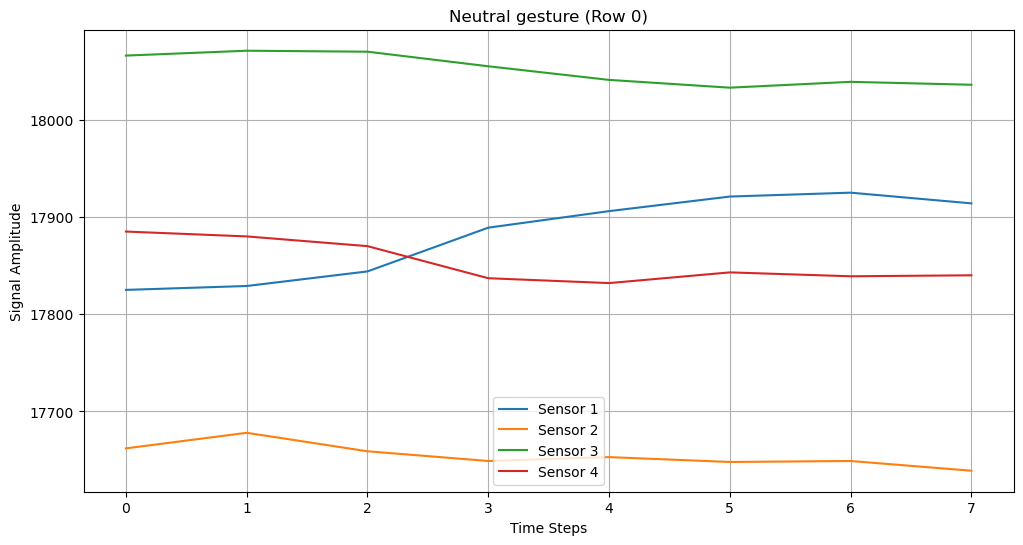

In [14]:
plot_time_signals(neutral_df, row_index=0, title='Neutral gesture')

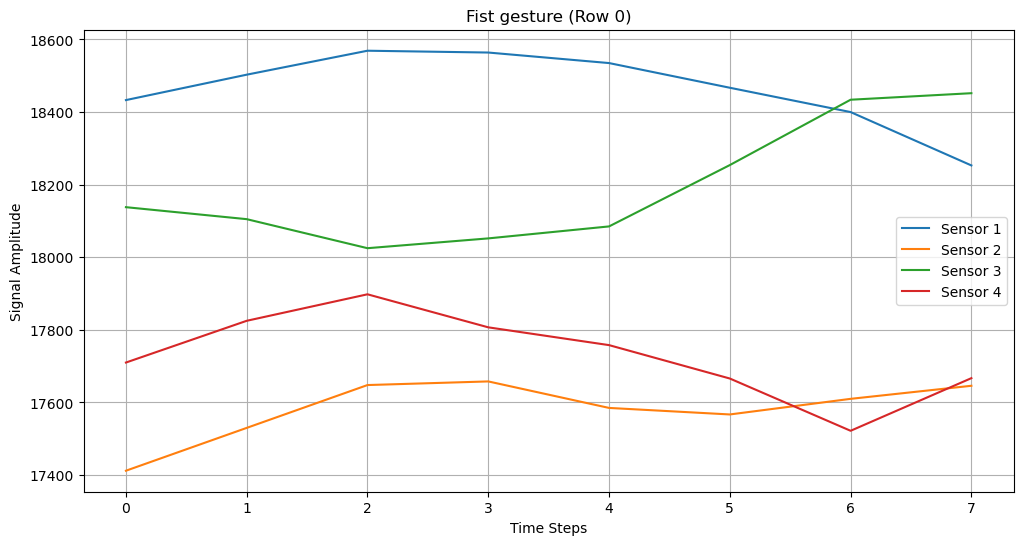

In [15]:
plot_time_signals(fist_df, row_index=0, title='Fist gesture')

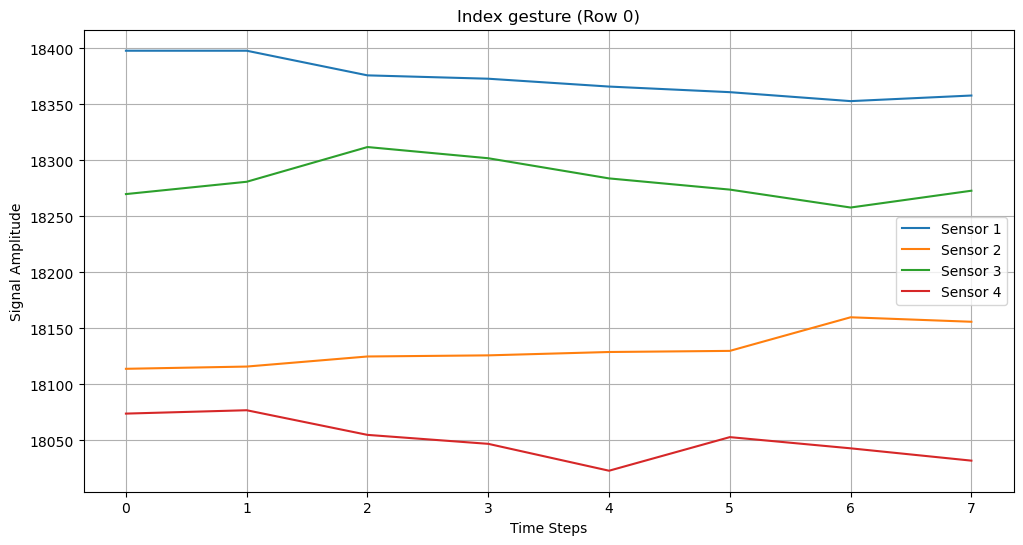

In [16]:
plot_time_signals(index_df, row_index=0, title='Index gesture')

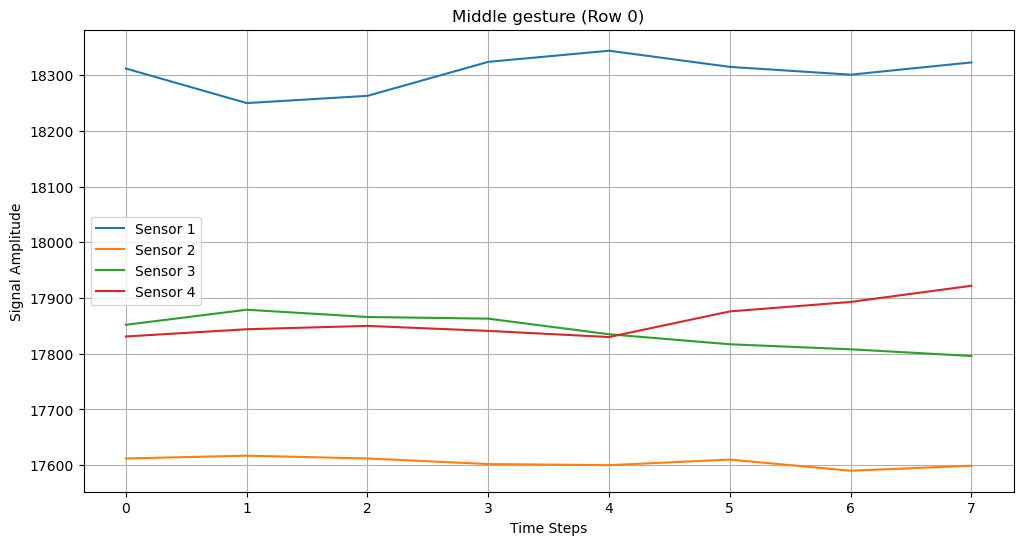

In [17]:
plot_time_signals(middle_df, row_index=0, title='Middle gesture')

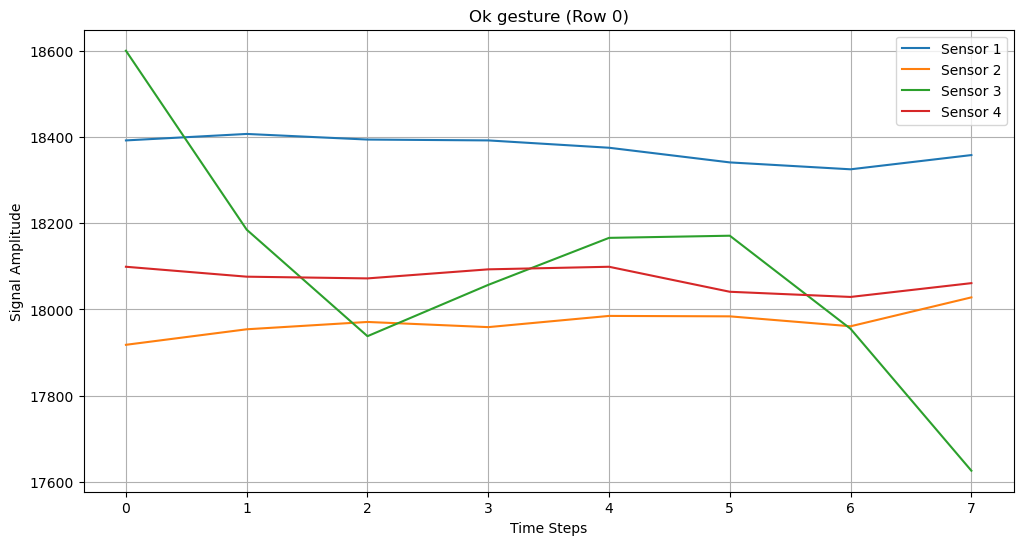

In [18]:
plot_time_signals(ok_df, row_index=0, title='Ok gesture')

In [19]:
if plot_all_timeline:
    plot_all_time_signals_per_sensor(neutral_df, title='Neutral gesture: whole timeline')
    plot_all_time_signals_per_sensor(fist_df, title='Fist gesture: whole timeline')
    plot_all_time_signals_per_sensor(peace_df, title='Peace gesture: whole timeline')
    plot_all_time_signals_per_sensor(ok_df, title='Ok gesture: whole timeline')
    plot_all_time_signals_per_sensor(index_df, title='Index gesture: whole timeline')
    plot_all_time_signals_per_sensor(middle_df, title='Middle gesture: whole timeline')

## Class distribution

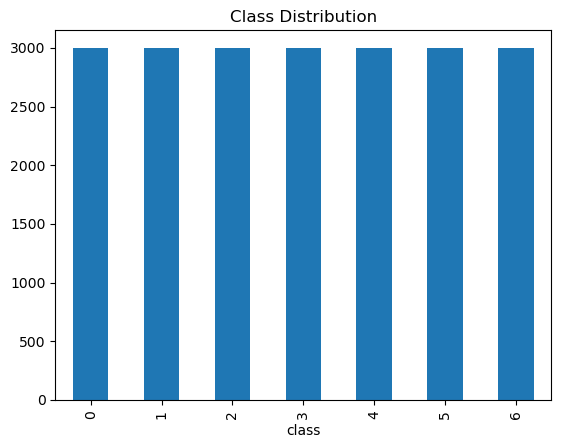

In [20]:
df.iloc[:, -1].value_counts().plot(kind='bar', title="Class Distribution")
plt.show()

## Sensor correlation analysis

/tmp/ipykernel_7587/515862046.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sensor_means = sensor_data.groupby(np.arange(sensor_data.shape[1]) // 8, axis=1).mean()


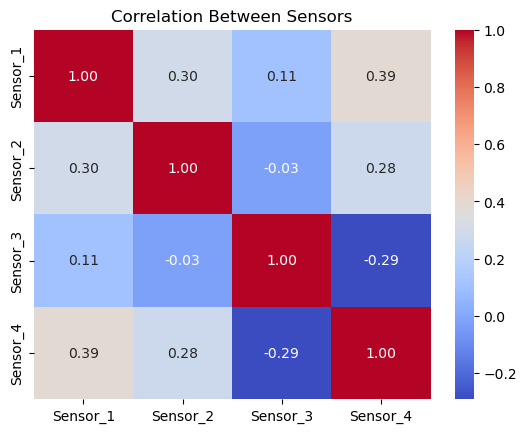

In [21]:
sensor_means = sensor_data.groupby(np.arange(sensor_data.shape[1]) // 8, axis=1).mean()

sensor_means.columns = [f"Sensor_{i+1}" for i in range(4)]

correlation = sensor_means.corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sensors")
plt.show()

In [22]:
from scipy import signal
from scipy.signal import butter
from numpy import mean, std

lf = 15
hf = 400
fs = 1150
trim = 4*8*5
bandpass_order = 3
outlier_rejection_stds = 6

def _remove_outliers(data):
    data_mean, data_std = mean(data.flatten()), std(data.flatten())
    cut_off = data_std * outlier_rejection_stds
    lower, upper = data_mean - cut_off, data_mean + cut_off

    outliers_removed = [x if x >= lower and x <= upper else 0.0 for x in data]
    return outliers_removed

def _remove_artefact(data):
    data[:trim] = 0
    return data

def preprocess_data(data):
    sos = butter(bandpass_order, (lf, hf), btype="bandpass", fs=fs, output="sos")
    proc_data = signal.sosfilt(sos, data) # f
    return proc_data


## Dimensionality Reduction

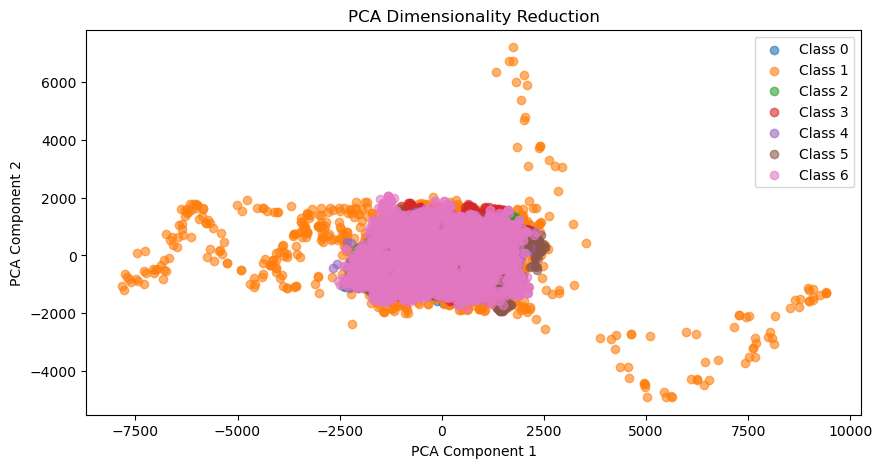

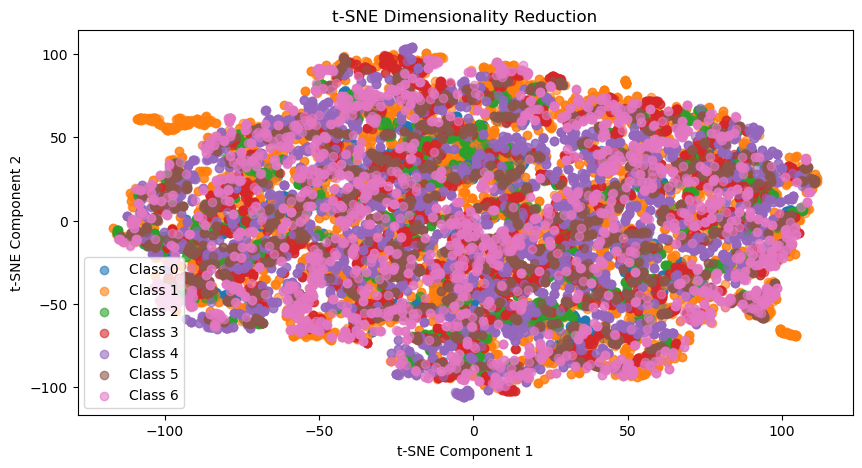

In [23]:
# PCA Dimensionality Reduction to 2 components
pca = PCA(n_components=2)
sensor_preproc = preprocess_data(sensor_data)
pca_result = pca.fit_transform(sensor_preproc)

# Plot PCA results
plt.figure(figsize=(10, 5))
for class_id in np.unique(labels):
    plt.scatter(pca_result[labels == class_id, 0], pca_result[labels == class_id, 1], label=f'Class {class_id}', alpha=0.6)
plt.title("PCA Dimensionality Reduction")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# t-SNE Dimensionality Reduction to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(sensor_preproc)

# Plot t-SNE results
plt.figure(figsize=(10, 5))
for class_id in np.unique(labels):
    plt.scatter(tsne_result[labels == class_id, 0], tsne_result[labels == class_id, 1], label=f'Class {class_id}', alpha=0.6)
plt.title("t-SNE Dimensionality Reduction")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

## Data Preprocessing

## Spectal Analysis

In [24]:
preprocess = False

def spectral_analysis_overall(dataframe):
    time_steps_per_sensor = dataframe.shape[1] // num_sensors

    # Separate gesture class and sensor data
    gesture_classes = dataframe.iloc[:, -1]
    sensor_data = dataframe.iloc[:, :-1]
    
    # Prepare to store FFT results for each sensor
    fft_results = {f'Sensor_{i+1}': [] for i in range(num_sensors)}

    # Loop over all rows and accumulate FFT results per sensor
    for index, row in sensor_data.iterrows():
        signals = np.array_split(row.values, num_sensors)
        for i, signal in enumerate(signals):
            if preprocess:
                signal = preprocess_data(signal)
            fft_result = np.abs(fft(signal))[:time_steps_per_sensor // 2]  # Positive frequencies only
            fft_results[f'Sensor_{i+1}'].append(fft_result)
    
    # Compute average FFT amplitude for each sensor
    avg_fft_results = {sensor: np.mean(fft_results[sensor], axis=0) for sensor in fft_results}

    # Plot average FFT for each sensor
    plt.figure(figsize=(15, 10))
    for sensor, avg_fft in avg_fft_results.items():
        freqs = fftfreq(time_steps_per_sensor, d=1/fs)[:time_steps_per_sensor // 2]  # Positive frequencies
        plt.plot(freqs, avg_fft, label=sensor)
    
    plt.title("Average Spectral Analysis for All Sensors")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Now analyze by gesture class
    unique_classes = np.unique(gesture_classes)
    plt.figure(figsize=(15, 10))
    for gesture_class in unique_classes:
        class_subset = dataframe[dataframe.iloc[:, -1] == gesture_class]
        class_fft_results = {f'Sensor_{i+1}': [] for i in range(num_sensors)}
        for _, row in class_subset.iloc[:, :-1].iterrows():
            signals = np.array_split(row.values, num_sensors)
            for i, signal in enumerate(signals):
                if preprocess:
                    signal = preprocess_data(signal)
                fft_result = np.abs(fft(signal))[:time_steps_per_sensor // 2]
                class_fft_results[f'Sensor_{i+1}'].append(fft_result)
        # Average across this class
        avg_class_fft = np.mean([np.mean(class_fft_results[sensor], axis=0) for sensor in class_fft_results], axis=0)
        freqs = fftfreq(time_steps_per_sensor, d=1/fs)[:time_steps_per_sensor // 2]
        plt.plot(freqs, avg_class_fft, label=f"Class {gesture_class}")

    plt.title("Average Spectral Analysis by Gesture Class")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

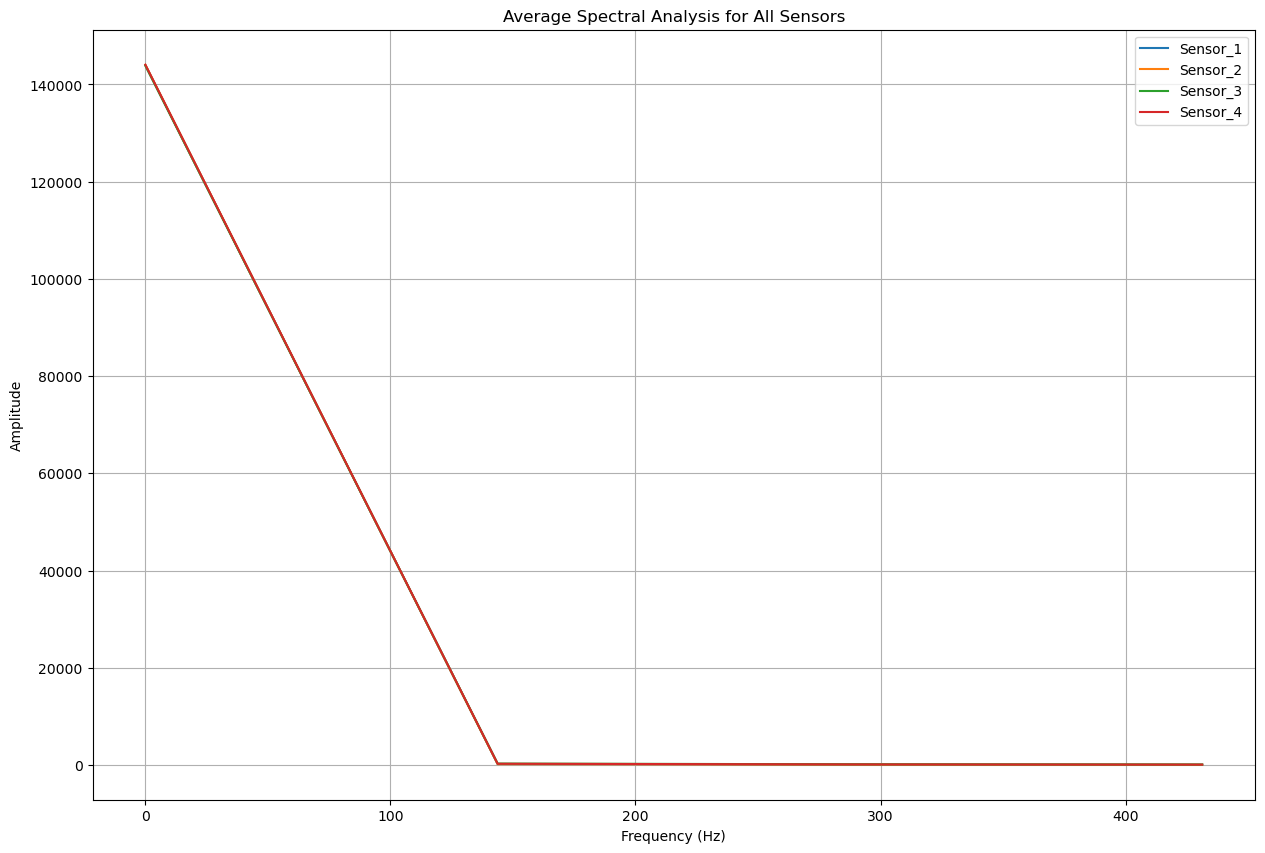

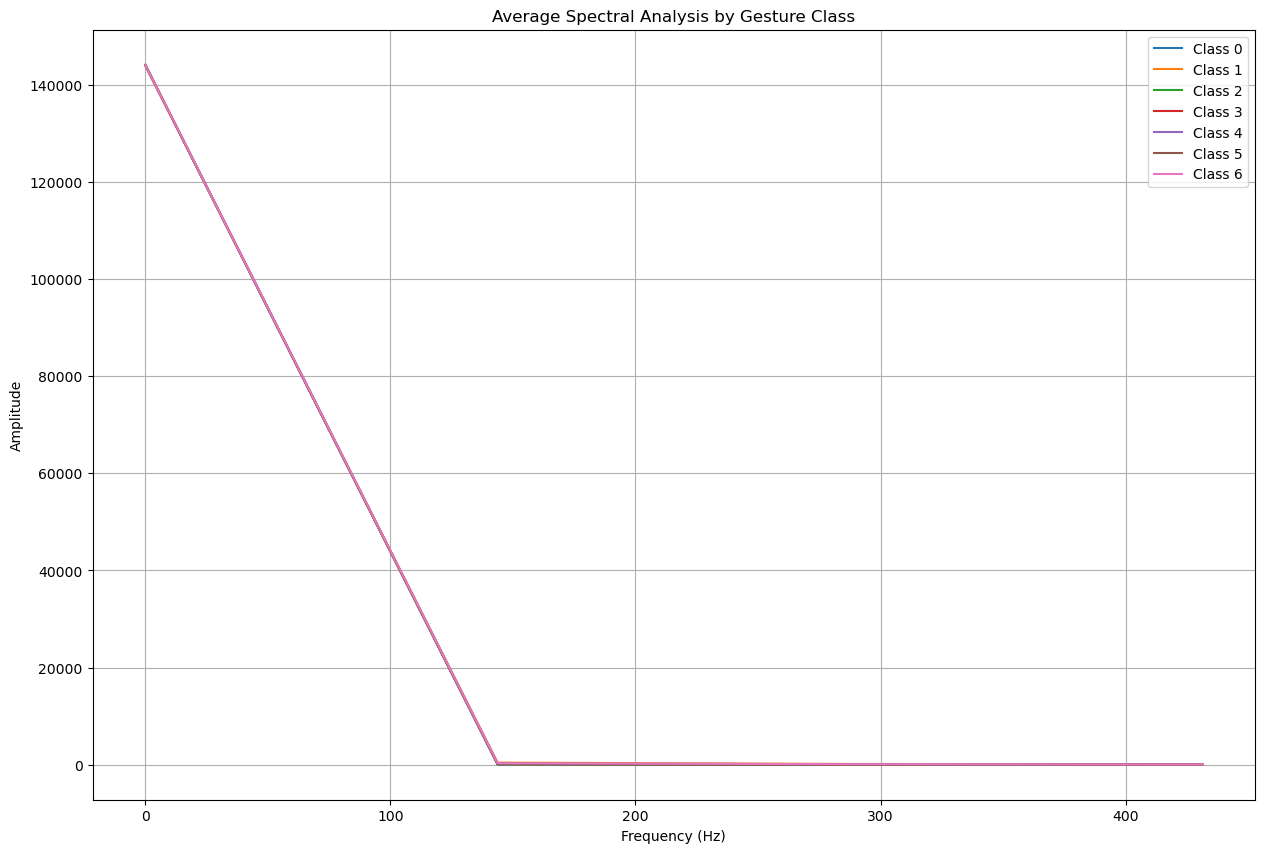

In [25]:
spectral_analysis_overall(df)

## Train networks

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
X = preprocess_data(X)

In [28]:
X.max(), X.min()

(17374.58486411874, -8322.299139545337)

In [29]:
# from sklearn.preprocessing import RobustScaler
# scaler= RobustScaler()
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [30]:
from pickle import dump
with open("custom_scaler.pkl", "wb") as f:
    dump(scaler, f, protocol=5)

In [31]:
X.max(), X.min()

(14.198417120473888, -12.258410025837641)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [33]:
# Count classes in y_test
unique, counts = np.unique(y_test, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4, 5, 6]), array([566, 627, 621, 580, 625, 608, 573]))

## Classical models

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
from pickle import dump
with open("custom_classifier.pkl", "wb") as f:
    dump(clf, f, protocol=5)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       566
           1       0.91      0.79      0.84       627
           2       0.84      0.92      0.88       621
           3       0.87      0.87      0.87       580
           4       0.93      0.94      0.94       625
           5       0.90      0.87      0.89       608
           6       0.84      0.86      0.85       573

    accuracy                           0.87      4200
   macro avg       0.87      0.87      0.87      4200
weighted avg       0.87      0.87      0.87      4200

Confusion Matrix: 
 [[485   0  42  14   3  19   3]
 [ 18 493   6  26  14   5  65]
 [ 21   1 571   8   2  16   2]
 [ 23  10  17 504  11   6   9]
 [  8   1   6  11 586   4   9]
 [ 33   0  32   3   2 530   8]
 [  8  39   5  16   9   6 490]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

lr_grid = {'max_depth' : [4, 8, 16, 32, 64, 128],
           'criterion' : ['entropy', 'gini']}

clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

gs = GridSearchCV(estimator=clf, param_grid=lr_grid, cv=5)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)

In [39]:
print('Classification Report: \n', classification_report(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       566
           1       0.91      0.79      0.85       627
           2       0.84      0.93      0.88       621
           3       0.89      0.87      0.88       580
           4       0.93      0.96      0.94       625
           5       0.90      0.87      0.88       608
           6       0.86      0.86      0.86       573

    accuracy                           0.88      4200
   macro avg       0.88      0.88      0.88      4200
weighted avg       0.88      0.88      0.88      4200

Confusion Matrix: 
 [[485   1  44   8   4  19   5]
 [ 17 495  11  24  12   9  59]
 [ 18   2 576   6   3  15   1]
 [ 24   9  17 506  11   7   6]
 [  6   3   5   8 598   3   2]
 [ 37   1  28   5   4 526   7]
 [  8  32   6  14  14   5 494]]


In [40]:
from pickle import dump
with open("custom_classifier.pkl", "wb") as f:
    dump(gs, f, protocol=5)

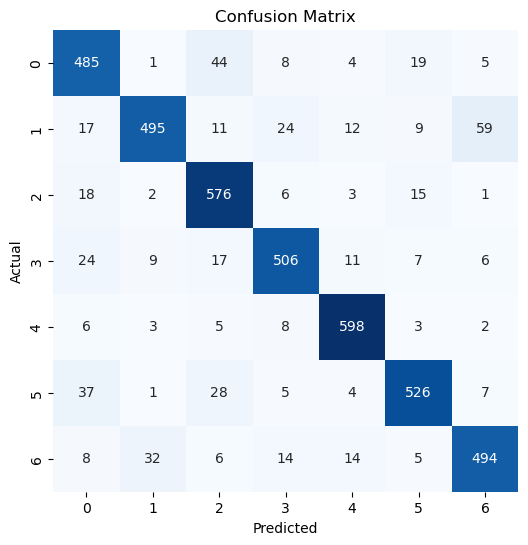

In [41]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Deep Learning

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [43]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(1024, 1024)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(1024, output_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.softmax(self.fc3(x), dim=1)
        return x

In [44]:
input_size = X_train.shape[1]
output_size = 7
batch_size = 64
epochs = 50
learning_rate = 0.001

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = NeuralNet(input_size, output_size)
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

NeuralNet(
  (fc1): Linear(in_features=32, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=1024, out_features=7, bias=True)
)

In [45]:
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    scheduler.step(running_loss / total)
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

Epoch 1/50, Loss: 1.7941, Accuracy: 35.85%
Epoch 2/50, Loss: 1.6630, Accuracy: 49.91%
Epoch 3/50, Loss: 1.6126, Accuracy: 55.18%
Epoch 4/50, Loss: 1.5869, Accuracy: 57.28%
Epoch 5/50, Loss: 1.5712, Accuracy: 59.10%
Epoch 6/50, Loss: 1.5614, Accuracy: 60.22%
Epoch 7/50, Loss: 1.5445, Accuracy: 61.96%
Epoch 8/50, Loss: 1.5353, Accuracy: 62.71%
Epoch 9/50, Loss: 1.5258, Accuracy: 63.76%
Epoch 10/50, Loss: 1.5135, Accuracy: 64.90%
Epoch 11/50, Loss: 1.5100, Accuracy: 65.35%
Epoch 12/50, Loss: 1.4999, Accuracy: 66.40%
Epoch 13/50, Loss: 1.4919, Accuracy: 67.42%
Epoch 14/50, Loss: 1.4870, Accuracy: 67.82%
Epoch 15/50, Loss: 1.4792, Accuracy: 68.58%
Epoch 16/50, Loss: 1.4649, Accuracy: 69.98%
Epoch 17/50, Loss: 1.4621, Accuracy: 70.47%
Epoch 18/50, Loss: 1.4595, Accuracy: 70.74%
Epoch 19/50, Loss: 1.4554, Accuracy: 70.95%
Epoch 20/50, Loss: 1.4485, Accuracy: 71.83%
Epoch 21/50, Loss: 1.4404, Accuracy: 72.50%
Epoch 22/50, Loss: 1.4409, Accuracy: 72.58%
Epoch 23/50, Loss: 1.4284, Accuracy: 74.0

In [46]:
torch.save(model.state_dict(), 'custom_nn.pth')

In [47]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    _, predicted = outputs.max(1)
    test_accuracy = predicted.eq(y_test_tensor).sum().item() / y_test_tensor.size(0) * 100

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 78.86%


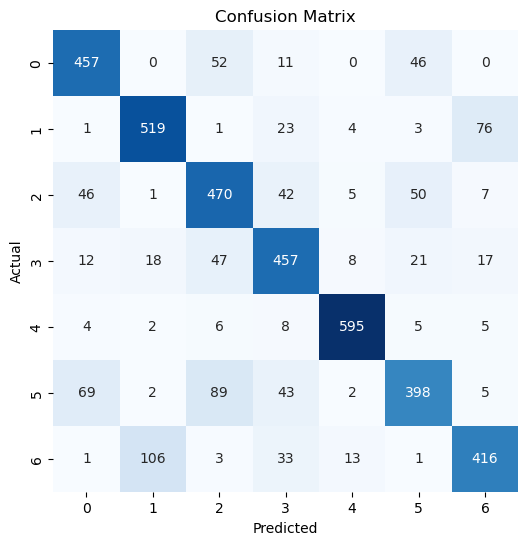

In [48]:
cm = confusion_matrix(y_test, predicted.cpu())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [49]:
class PureLSTM(nn.Module):
    
    def __init__(self, n_features, n_hidden, n_sequence, n_layers, n_classes):
        super(PureLSTM, self).__init__()
        
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.n_sequence = n_sequence
        self.n_layers = n_layers
        self.n_classes = n_classes
        
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=n_hidden, num_layers=n_layers, batch_first=True)
        
        self.linear_1 = nn.Linear(in_features=n_hidden, out_features=128)
        self.dropout_1 = nn.Dropout(p=0.2)
        
        self.linear_2 = nn.Linear(in_features=128, out_features=n_classes)        
        
    
    def forward(self, x):
        
        self.hidden = (
            torch.zeros(self.n_layers, x.shape[0], self.n_hidden).to(device),
            torch.zeros(self.n_layers, x.shape[0], self.n_hidden).to(device)
        )
    
        out, (hs, cs) = self.lstm(x.view(len(x), self.n_sequence, -1),self.hidden)
        out = out[:,-1,:]

        out = self.linear_1(out)
        out = self.dropout_1(out)
        out = self.linear_2(out)
        
        return out
    
def train_model(model, train_dataloader, n_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)
    
    for epoch in range(n_epochs):
        for i, (inputs, labels) in enumerate(train_dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            
            loss = loss_fn(outputs, labels)

            if i == 0 and (epoch+1)%10==0:
                print(f'Epoch {epoch+1} train loss: {loss.item()}')

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

             # Compute running loss and accuracy
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    scheduler.step(running_loss / total)
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total * 100

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")
        
    return model

In [50]:
n_features = 32
n_sequence=1
# n_features = 4
# n_sequence=8
n_hidden=32*2
n_layers=2
epochs = 270

model = PureLSTM(n_features, n_hidden, n_sequence, n_layers, output_size).to(device)

print("Train Data Shape ",X_train.shape, y_train.shape)
print("Test Data Shape ",X_test.shape, y_test.shape)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# X_train_tensor = X_train_tensor.view(-1, n_sequence, n_features)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model = train_model(model, train_loader, n_epochs = epochs)

Train Data Shape  (16800, 32) (16800,)
Test Data Shape  (4200, 32) (4200,)
Epoch 10 train loss: 0.9134234189987183
Epoch 20 train loss: 1.067077875137329
Epoch 30 train loss: 0.6128423810005188
Epoch 40 train loss: 0.7972418069839478
Epoch 50 train loss: 0.6421959400177002
Epoch 60 train loss: 0.645368754863739
Epoch 70 train loss: 0.49144190549850464
Epoch 80 train loss: 0.3691083788871765
Epoch 90 train loss: 0.3800452947616577
Epoch 100 train loss: 0.3585236966609955
Epoch 110 train loss: 0.20778772234916687
Epoch 120 train loss: 0.1493387669324875
Epoch 130 train loss: 0.18924318253993988
Epoch 140 train loss: 0.1505361795425415
Epoch 150 train loss: 0.364928662776947
Epoch 160 train loss: 0.10841753333806992
Epoch 170 train loss: 0.14068986475467682
Epoch 180 train loss: 0.14465516805648804
Epoch 190 train loss: 0.09265047311782837
Epoch 200 train loss: 0.16311950981616974
Epoch 210 train loss: 0.09740783274173737
Epoch 220 train loss: 0.03445744514465332
Epoch 230 train loss: 0.0

In [53]:
torch.save(model.state_dict(), 'custom_lstm.pth')

def evaluateModel(outputs, y):
    _, predicted = outputs.max(1)
    test_accuracy = predicted.eq(y).sum().item() / y.size(0) * 100
    return test_accuracy, predicted

model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    y_hat_test = model(X_test_tensor)
    acc, predicted = evaluateModel(y_hat_test, y_test_tensor)
    print(f"Test Accuracy: {acc:.2f}%")

Test Accuracy: 83.29%


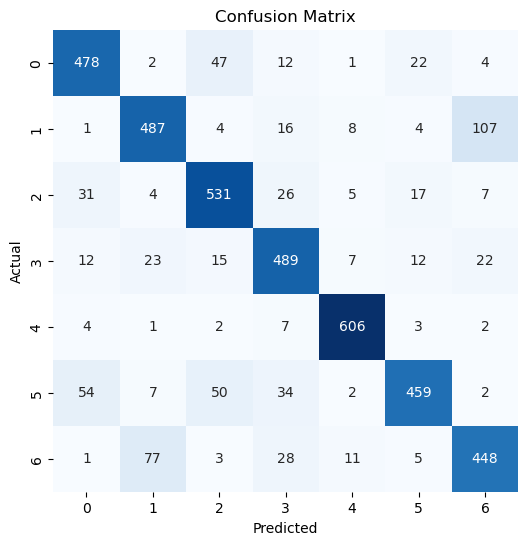

In [52]:
cm = confusion_matrix(y_test, predicted.cpu())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Feature engineering